In [1]:
import re
import sys
import glob
# import uproot
# import ROOT
import numpy  as np
import tables as tb
import pandas as pd

from os.path   import expandvars, basename, join
from itertools import groupby

import matplotlib.pyplot as plt
%matplotlib widget

In [2]:
mass = dict({"e-": 0.511, "mu-": 105.658, "pi+": 139.57})

In [43]:
particle = "e-"
filename = expandvars(f"$HOME/Software/WCSimFQTuningTools/Conversion/charge_distributions.h5")

In [44]:
f = tb.open_file(filename)
keys_energies = np.array([(key, float(re.findall("E_(\d+(?:\.\d+)?)", key)[0])) for key in f.root._v_children.keys()]
                        , dtype = [("key", object), ("energy", float)])
keys_energies = np.sort(keys_energies, order="energy")

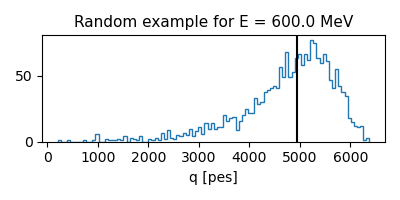

In [97]:
key_E = np.random.choice(keys_energies)
key_E = keys_energies[-1]
distribution = getattr(f.root, key_E[0]).read()

plt.figure(figsize=(4, 2))

plt.title(f"Random example for E = {key_E[1]} MeV", fontsize=11)

h, bins = np.histogram(distribution, bins=100)
plt.hist(distribution, bins=bins, histtype="step")

plt.axvline(np.median(distribution), color="k")

plt.xlabel("q [pes]")

plt.tight_layout()

In [60]:
qs = np.zeros(len(keys_energies))

for i, (key, energy) in enumerate(keys_energies):
    distribution = getattr(f.root, key).read()
    # h, bins = np.histogram(distribution, bins=50)
    qs[i] = np.median(distribution)

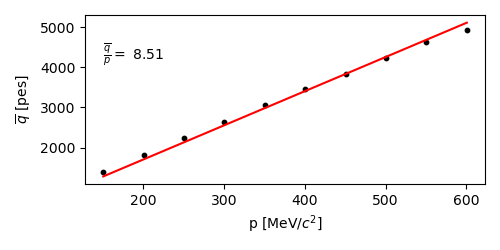

In [63]:
plimits = [100, 1000]

m = mass[particle]
T = keys_energies["energy"]
momenta = np.sqrt((T+m)**2 - m**2)
sel = (plimits[0]<momenta) & (momenta<=plimits[1])

plt.figure(figsize=(5, 2.5))

plt.scatter(momenta, qs, color="k", s=10)

# fit
from scipy.optimize import curve_fit
def linear_with_fixed_intercept(x, a):
    fixed_intercept = 0.
    return a * x + fixed_intercept

# Fit the data
popt, _ = curve_fit(linear_with_fixed_intercept, momenta[sel], qs[sel])
a_fitted = popt[0]
# pars = np.polyfit(momenta[sel], qs[sel], deg=1)
xs = np.linspace(momenta[sel].min(), momenta[sel].max(), 100)
plt.plot(xs, linear_with_fixed_intercept(xs, popt[0]), color="r")

plt.text(np.mean(momenta)*0.4, qs.max()*0.85, r"$\frac{\overline{q}}{p}=$ " +  f"{round(popt[0], 2)}")

plt.xlabel(r"p [MeV/$c^2$]")
plt.ylabel(r"$\overline{q}$ [pes]")

plt.tight_layout()

In [90]:
qs/momenta

array([9.1828579 , 9.02962198, 8.98147163, 8.81337711, 8.7471565 ,
       8.64016887, 8.52687169, 8.44732485, 8.43073694, 8.2297774 ])